In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [286]:
features_df = pd.read_parquet("../data/contribution_data/extracted_features_v2.parquet")

In [287]:
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism
0,2377515,32.000000,iD 1.5.4,-597,0,0,0,1.180083e-05,0,-62.976084,...,0,0,0,0,0,0,0,0,0,True
1,2377515,32.000000,iD 1.5.4,-661,0,0,0,1.543374e-05,0,-62.956141,...,0,0,0,0,0,0,0,0,0,True
2,6335199,5.490196,iD 2.5.1,-6351,0,0,0,7.911717e-06,0,-90.207543,...,0,0,0,0,0,1,0,0,0,True
3,5193146,3.762032,JOSM,-60560,0,0,0,3.357874e-05,0,-0.898112,...,0,0,0,0,0,0,1,0,0,True
4,3149129,3791.000000,JOSM,-47,0,0,0,5.833380e-09,0,-34.881410,...,0,0,0,0,0,0,0,0,0,True


In [288]:
features_df = features_df.sample(frac=1, random_state=42).reset_index(drop=True)
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,0,0,1,0,0,0,False
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,0,0,True
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,0,0,False
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,0,0,1,0,0,0,0,0,True
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,0,0,True


In [289]:
if features_df.columns.__contains__('xzcode'):
    # Split 'xzcode' column into two separate columns 'code' and 'level'
    features_df[['code', 'level']] = pd.json_normalize(features_df['xzcode'])
    features_df.drop('xzcode', axis=1, inplace=True)
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism,code,level
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,1,0,0,0,False,5016864557,16
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,True,5014238182,16
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,False,5011061704,16
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,1,0,0,0,0,0,True,3184713878,16
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,True,5020807494,16


In [290]:
features_df.members.unique()

array([None], dtype=object)

In [291]:
if features_df.columns.__contains__('geometry'):
    features_df.drop('geometry', axis=1, inplace=True)
    
if features_df.columns.__contains__('osm_id'):
    features_df.drop('osm_id', axis=1, inplace=True)
    
    
if features_df.columns.__contains__('members'):
    features_df.drop('members', axis=1, inplace=True)
    
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism,code,level
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,1,0,0,0,False,5016864557,16
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,True,5014238182,16
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,False,5011061704,16
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,1,0,0,0,0,0,True,3184713878,16
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,True,5020807494,16


In [292]:
features_df.columns.size

55

In [293]:
features_df.columns = features_df.columns.str.replace(' ', '_', regex=True)
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism,code,level
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,1,0,0,0,False,5016864557,16
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,True,5014238182,16
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,False,5011061704,16
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,1,0,0,0,0,0,True,3184713878,16
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,True,5020807494,16


In [294]:
X = features_df.drop('vandalism', axis=1).copy()
X.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,geological,healthcare,highway,historic,landuse,leisure,man_made,military,code,level
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,0,1,0,0,0,5016864557,16
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,0,5014238182,16
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,0,5011061704,16
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,0,1,0,0,0,0,0,3184713878,16
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,0,5020807494,16


In [295]:
y = features_df['vandalism'].copy()
y.head()

0    False
1     True
2    False
3     True
4     True
Name: vandalism, dtype: bool

In [296]:
X_encoded = pd.get_dummies(X, columns=['source_reliability',
                                       'historical_validity',
                                       'country_count',
                                       'population_changed',
                                       'boundary_changed',
                                       'name_changed',
                                       'tags_modified',
                                       'tags_added',
                                       'tags_removed',
                                       'edit_time_of_day',
                                       'geometry_valid',
                                       'editor_used',
                                       'osm_type',
                                       'contribution_type',
                                       'status'])
X_encoded.head()

,user_id,user_edit_frequency,area_delta,length_delta,area,length,bounding_box_size,xmax,xmin,ymax,...,osm_type_way,contribution_type_CREATED,contribution_type_DELETED,contribution_type_GEOMETRY,contribution_type_NONE,contribution_type_TAG,contribution_type_TAG_GEOMETRY,status_deleted,status_history,status_latest
0,1020680,1.329399,1644,-216,1644,0,5.671549e-07,16.862373,16.861237,45.186972,...,True,False,False,False,False,False,True,False,True,False
1,1075986,0.495575,117,0,117,0,3.177526e-08,5.159954,5.159741,48.772853,...,True,True,False,False,False,False,False,False,False,True
2,246941,61.000000,0,0,0,0,0.000000e+00,1.646210,1.646210,45.822240,...,False,False,False,False,False,True,False,False,False,True
3,3392,8.180723,0,-205,0,210,3.094182e-07,-115.261025,-115.261189,36.145576,...,True,False,False,True,False,False,False,False,True,False
4,1942179,2986.044444,0,0,0,0,0.000000e+00,17.466017,17.466017,48.908884,...,False,True,False,False,False,False,False,False,True,False


In [297]:
assert X_encoded.dtypes.__contains__('object') == False

In [298]:
y = y.replace(True, 1)
y = y.replace(False, 0)

C:\Users\saise\AppData\Local\Temp\ipykernel_20476\3107921932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(False, 0)


In [299]:
y.dtype

dtype('int64')

In [300]:
sum(y) / len(y)

0.6621638875411762

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify=y)

In [302]:
# Get the shapes of the datasets
shapes = {
    'X_train shape': X_train.shape,
    'X_test shape': X_test.shape,
    'y_train shape': y_train.shape,
    'y_test shape': y_test.shape
}

# Convert shapes to DataFrame for better display
shapes_df = pd.DataFrame(shapes, index=['Number of Samples', 'Number of Features']).T
print(shapes_df)

               Number of Samples  Number of Features
X_train shape             281959                 587
X_test shape              187973                 587
y_train shape             281959              281959
y_test shape              187973              187973


In [303]:
# 1. Calculate the total number of samples in train and test sets
total_train = len(y_train)
total_test = len(y_test)

# 2. Calculate the number of vandalism (assuming 'vandalism' is labeled as 1)
vandalism_train = sum(y_train)
vandalism_test = sum(y_test)

# 3. Calculate the number of non-vandalism (assuming 'non-vandalism' is labeled as 0)
non_vandalism_train = total_train - vandalism_train
non_vandalism_test = total_test - vandalism_test

# 4. Print the statistics
print(f"Train Set Statistics:\n"
      f"Total: {total_train}\n"
      f"Vandalism: {vandalism_train}\n"
      f"Non-Vandalism: {non_vandalism_train}\n")

print(f"Test Set Statistics:\n"
      f"Total: {total_test}\n"
      f"Vandalism: {vandalism_test}\n"
      f"Non-Vandalism: {non_vandalism_test}\n")


Train Set Statistics:
Total: 281959
Vandalism: 186703
Non-Vandalism: 95256

Test Set Statistics:
Total: 187973
Vandalism: 124469
Non-Vandalism: 63504


In [304]:
sum(y_train)/len(y_train)

0.6621636479062559

In [305]:
sum(y_test)/len(y_test)

0.6621642469929192

In [306]:
import xgboost as xgb
import matplotlib.pyplot as plt

print(X_train.shape)

# Convert the datasets to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify model parameters with both 'aucpr' and 'error'
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': ['aucpr', 'error'],  # 'error' is 1 - accuracy
    'seed': 42
}

# Set up the evaluation set with both training and test sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Dictionary to store evaluation results
evals_result = {}

# Train the model with early stopping and store the results
bst = xgb.train(params, dtrain, num_boost_round=100, evals=evals, 
                early_stopping_rounds=15, evals_result=evals_result, 
                verbose_eval=True)


(281959, 587)
[0]	train-aucpr:0.95395	train-error:0.18935	eval-aucpr:0.95389	eval-error:0.18881
[1]	train-aucpr:0.97043	train-error:0.14900	eval-aucpr:0.97056	eval-error:0.14884
[2]	train-aucpr:0.98006	train-error:0.12378	eval-aucpr:0.98001	eval-error:0.12401
[3]	train-aucpr:0.98428	train-error:0.10531	eval-aucpr:0.98417	eval-error:0.10669
[4]	train-aucpr:0.98634	train-error:0.09427	eval-aucpr:0.98622	eval-error:0.09575
[5]	train-aucpr:0.98705	train-error:0.08397	eval-aucpr:0.98696	eval-error:0.08435
[6]	train-aucpr:0.98804	train-error:0.08087	eval-aucpr:0.98795	eval-error:0.08111
[7]	train-aucpr:0.98841	train-error:0.07855	eval-aucpr:0.98835	eval-error:0.07878
[8]	train-aucpr:0.98865	train-error:0.07848	eval-aucpr:0.98861	eval-error:0.07883
[9]	train-aucpr:0.98926	train-error:0.07643	eval-aucpr:0.98920	eval-error:0.07654
[10]	train-aucpr:0.98988	train-error:0.07480	eval-aucpr:0.98982	eval-error:0.07494
[11]	train-aucpr:0.99034	train-error:0.07309	eval-aucpr:0.99029	eval-error:0.07312


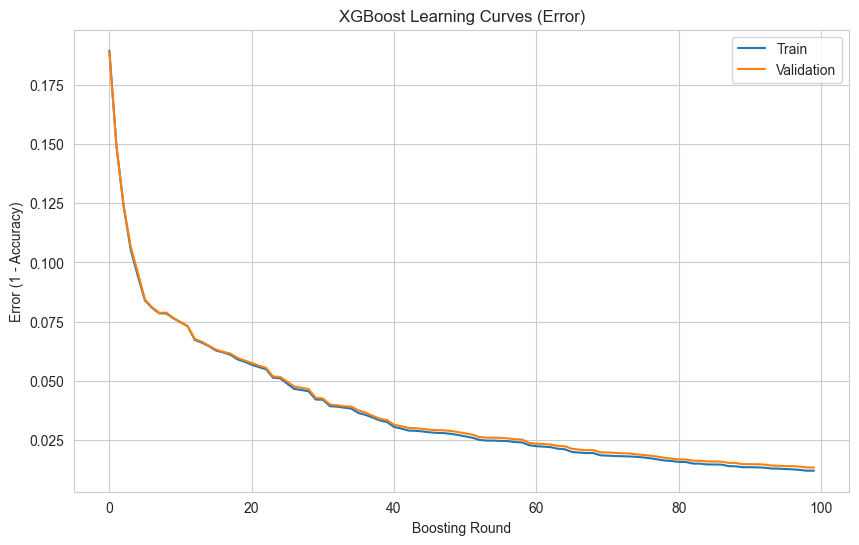

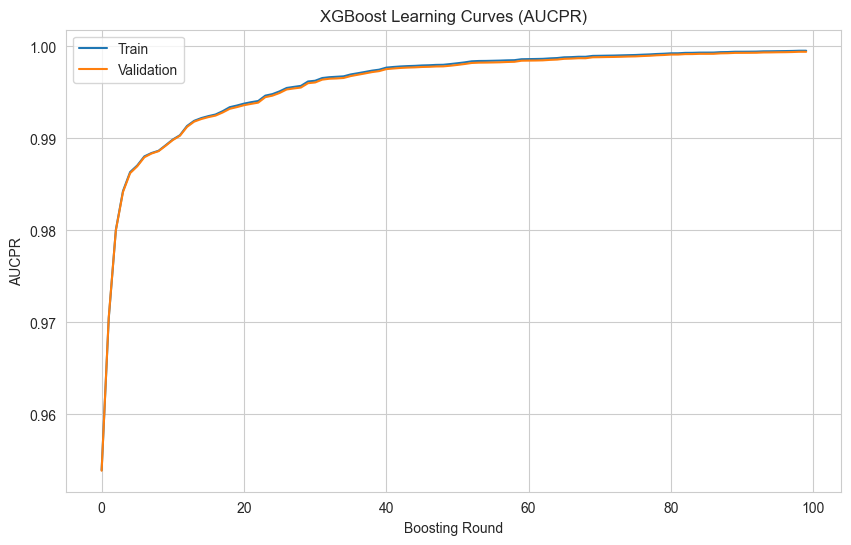

In [307]:
# Plotting the learning curves (training vs validation)
epochs = len(evals_result['train']['error'])
x_axis = range(0, epochs)

# Plot training and validation error (1 - accuracy)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['error'], label='Train')
plt.plot(x_axis, evals_result['eval']['error'], label='Validation')
plt.xlabel('Boosting Round')
plt.ylabel('Error (1 - Accuracy)')
plt.title('XGBoost Learning Curves (Error)')
plt.legend()
plt.show()

# Plot training and validation aucpr
plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['aucpr'], label='Train')
plt.plot(x_axis, evals_result['eval']['aucpr'], label='Validation')
plt.xlabel('Boosting Round')
plt.ylabel('AUCPR')
plt.title('XGBoost Learning Curves (AUCPR)')
plt.legend()
plt.show()


In [308]:
import numpy as np

# Make predictions on the test data
y_pred_proba = bst.predict(dtest)  # Get predicted probabilities
y_pred = np.where(y_pred_proba > 0.5, 1, 0)  # Convert probabilities to binary predictions


Statistics:
True Negatives (TN): 62439
False Positives (FP): 1065
False Negatives (FN): 1470
True Positives (TP): 122999
Accuracy: 0.9865
Precision: 0.9914
Recall: 0.9882
F1 Score: 0.9898


<Figure size 800x600 with 0 Axes>

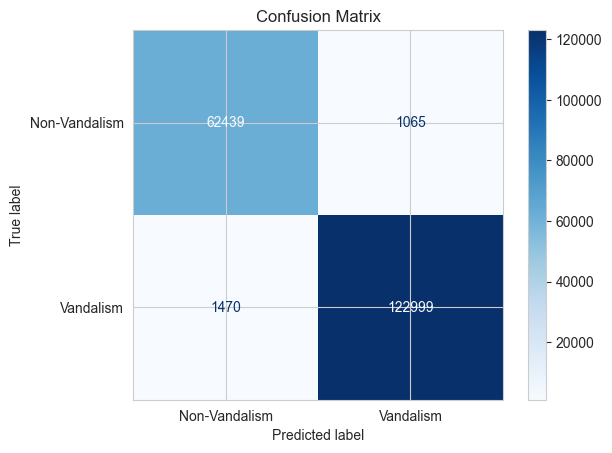

In [309]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate additional statistics
TN, FP, FN, TP = cm.ravel()  # Unpack the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print statistics
print(f"\nStatistics:")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Vandalism', 'Vandalism']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()